In [2]:
%matplotlib inline
from modsim import *
from scipy import*
from pandas import read_html

In [3]:
t0=1783
t_end=2016
p0=35.49

In [4]:
system = System(t0=t0, 
                t_end=t_end,
                p0=p0)

In [5]:
filename = 'https://en.wikipedia.org/w/index.php?title=Demographics_of_Iceland&oldid=801858011'
tables= read_html (filename,
                   header = 0,
                   index_col = 0,
                   decimal = 'M')

In [6]:
table1 = tables[1]
table1

,Average population (x 1000),Live births,Deaths,Natural change,Crude birth rate (per 1000),Crude death rate (per 1000),Natural change (per 1000),Total fertility rate
Year,,,,,,,,
1900,78,2237,1545,692,28.6,19.8,8.9,3.93
1901,78,2179,1155,1024,27.8,14.7,13.1,3.86
1902,79,2220,1262,958,28.1,16.0,12.1,3.95
1903,79,2244,1324,920,28.3,16.7,11.6,4.00
1904,80,2293,1242,1051,28.7,15.5,13.1,4.09
1905,81,2271,1435,836,28.1,17.8,10.4,4.02
1906,82,2346,1193,1153,28.8,14.6,14.1,4.14
1907,83,2304,1396,908,27.9,16.9,11.0,4.04
1908,83,2270,1594,676,27.3,19.1,8.1,4.01


In [7]:
table1.columns = ['avg_pop','births','deaths','net_change','b_rate','d_rate','npt','fertility']

In [8]:
table1.index

Int64Index([1900, 1901, 1902, 1903, 1904, 1905, 1906, 1907, 1908, 1909,
            ...
            2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016],
           dtype='int64', name='Year', length=117)

In [9]:
avg_pop = table1.avg_pop
#avg_pop.index
avg_pop

Year
1900     78
1901     78
1902     79
1903     79
1904     80
1905     81
1906     82
1907     83
1908     83
1909     84
1910     85
1911     85
1912     86
1913     87
1914     88
1915     89
1916     89
1917     91
1918     92
1919     92
1920     94
1921     95
1922     96
1923     97
1924     98
1925     99
1926    101
1927    103
1928    104
1929    106
       ... 
1987    246
1988    250
1989    253
1990    255
1991    258
1992    261
1993    264
1994    266
1995    267
1996    269
1997    271
1998    274
1999    277
2000    281
2001    285
2002    288
2003    290
2004    292
2005    297
2006    304
2007    312
2008    317
2009    318
2010    318
2011    319
2012    321
2013    324
2014    329
2015    332
2016    338
Name: avg_pop, Length: 117, dtype: int64

In [10]:
def plot_estimates(table):
    """Plot Icelandic population estimates.
    
    table: DataFrame with column 'avg_pop'
    """
    
    plot(avg_pop, '.-', color='darkblue', label='Average Population Data')
    
    decorate(xlabel='Year',
             ylabel='Icelandic Population')

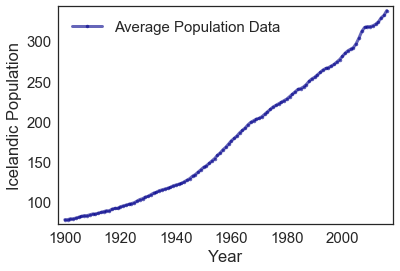

In [11]:
newfig()
plot_estimates(table1)

In [46]:
def run_simulation(system, update_func):
    """Simulate the system using any update function.
    
    Adds TimeSeries to `system` as `results`.

    system: System object
    update_func: function that computes the population next year
    """
    
    results = TimeSeries()
    results[system.t0] = system.p0
    results[system.t0-1] = system.p0
    for t in linrange(system.t0, system.t_end):
        results[t] = update_func(t, system, results[t-1])
    system.results = results
    #print(system.results)

In [42]:
def plot_results(system,title=None):
    plot(system.results, "r", label= 'Model')
    decorate(xlabel='Years',
             ylabel='Population',
             title=title)

In [43]:
def updatefuncE(t, system, current_pop):
    """Compute the population next year.
    
    pop: current population
    t: current year
    system: system object containing parameters of the model
    
    returns: population next year
    
    k: growth rate
    """

    new_tot = current_pop*e**(k*t)
        
    return new_tot

In [44]:
e = 2.71828
k = .000005

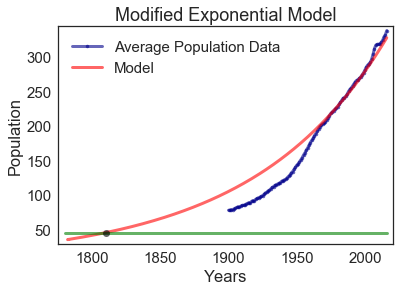

In [52]:
x=(1780,2016)
y=(45.500,45.500)
newfig()
run_simulation(system,updatefuncE)
plot_estimates(table1)
plot_results(system,'Modified Exponential Model')
plot(x,y, "g", label='Original Population')
plot(1810,45.6, "ko")